# Case Study - Diamond Price Prediction

### Business Understanding
Diamond is one of the strongest and the most valuable substances produced naturally as a form of carbon. However, unlike gold and silver, determining the price of a diamond is very complex because many features are to be considered for determining its price.

The value of diamonds depends upon their structure, cut, inclusions (impurity), carats, and many other features. The uses of diamonds are many, such as in industries, as they are effective in cutting, polishing, and drilling. Since diamonds are extremely valuable, they have been traded across different countries for centuries now and this trade only increases with time. They are graded and certified based on the "four Cs", which are color, cut, clarity, and carat. These are the only metrics that are being used to the quality of diamonds and sets the price of the diamond. This metric allows uniform understanding for people across the world to buy diamonds, which allows ease of trade and value for what is purchased.

### Understanding the 4 C's
- Cut
- Color
- Clarity
- Carat  

Credits - https://www.brides.com/story/choosing-engagement-ring-four-cs

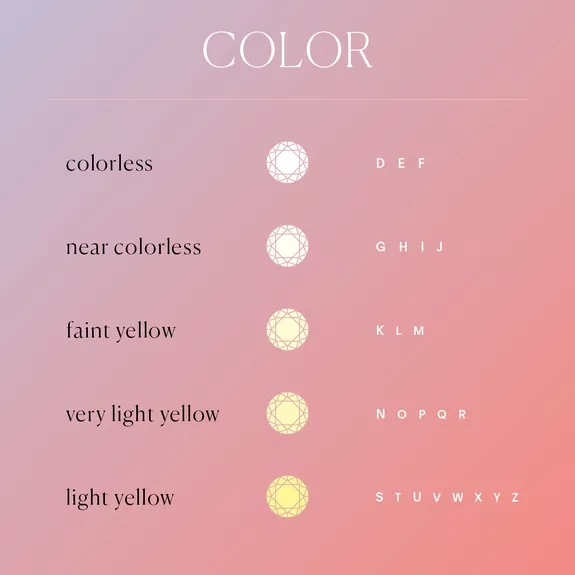

In [1]:
from IPython import display
display.Image("img/color_.jpg")

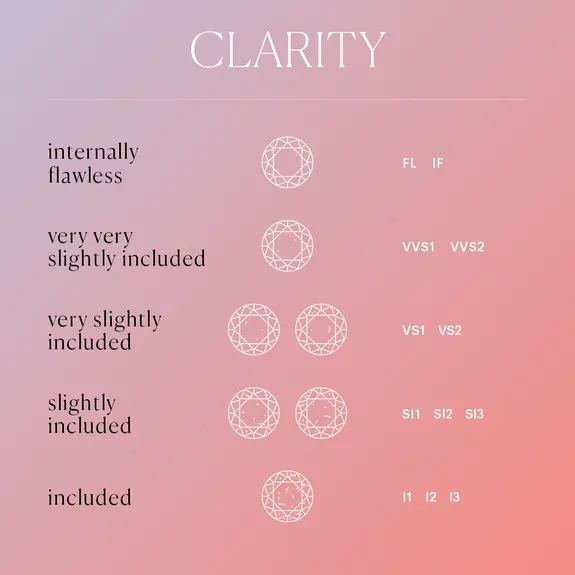

In [2]:
display.Image("img/clarity_.jpg")

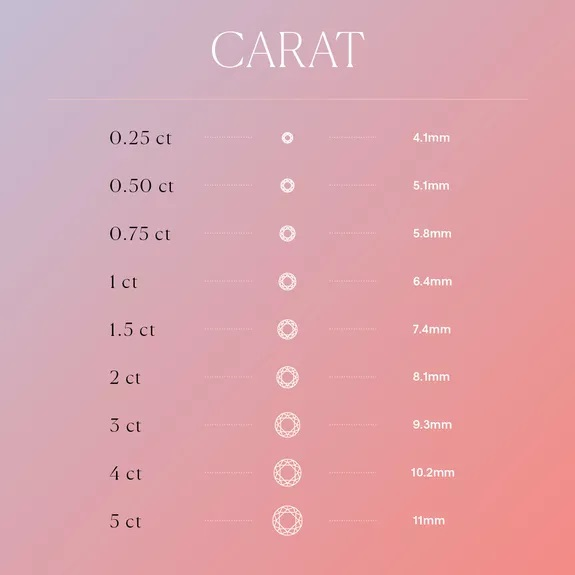

In [3]:
display.Image("img/carat_.jpg")

## Task

In this notebook, you will learn:
- How to split the given data into Train and Test?
- How to perform Data Preparation on - 
    - Categorical Columns - OneHotEncoding and LabelEncoding
    - Numerical Columns - Standardization and Normalization
- How to build ML models that can predict Price of a Diamond?

## Import the required Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Data

In [5]:
df = pd.read_csv('data/diamonds.csv')

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


`price` price in US dollars (\\$ 326 - \\$ 18,823)

`carat` weight of the diamond (0.2 - 5.01)

`cut` quality of the cut (Fair, Good, Very Good, Premium, Ideal)

`color` diamond colour, from J (worst) to D (best)

`clarity` a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

`x` length in mm (0 - 10.74)

`y` width in mm (0 - 58.9)

`z` depth in mm (0 - 31.8)

`depth` total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43 - 79)

`table` width of top of diamond relative to widest point (43 - 95)

In [6]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [7]:
df.shape

(53940, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [9]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### Machine Learning Problem

**Build a system which can take features of diamond like carat, cut, color, clarity, x, y, z, etc.. and `predicts the price of diamond`.**

Target Variable: ______

In [10]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [11]:
df = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'price']]

df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


`price` price in US dollars (\\$ 326 - \\$ 18,823)

`carat` weight of the diamond (0.2 - 5.01)

`cut` quality of the cut (Fair, Good, Very Good, Premium, Ideal)

`color` diamond colour, from J (worst) to D (best)

`clarity` a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

`x` length in mm (0 - 10.74)

`y` width in mm (0 - 58.9)

`z` depth in mm (0 - 31.8)

`depth` total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43 - 79)

`table` width of top of diamond relative to widest point (43 - 95)

## Exploratory Data Analysis

- Univariate Analysis **`(Self)`**
- Bivariate Analysis **`(Self)`**
- Missing Values **`(Self)`**
- Outliers **`(Self)`**

## Data Preparation

- Train Test Split
- Encoding for Categorical Columns 
    - Ordinal : LabelEncoding or OrdinalEncoding
    - Nominal : OneHotEncoding or get_dummies
- Encoding for Numerical Columns
    - Standardization (z-transformation)

**We will be following below mentioned steps:**  
a. Identify the Target Variable and Splitting the Data into train and test  
b. Separating Categorical and Numerical Columns  
c. Rescaling Numerical Columns (Standardization or z-transformation)  
d. Applying OneHotEncoding on Categorical Columns  
e. Applying Label Encoding on Categorical Columns    
f. Concatinating the Encoded Categorical Features and Scaled Numerical Features  

### a. Identify the Target Variable and Splitting the Data into Train and Test

`!pip install -U scikit-learn`

In [12]:
import sklearn

print(sklearn.__version__)

1.1.0


In [13]:
# Identifying the inputs (X) and output (y)

y = df['price']

X = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]

In [14]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [15]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
29477,0.32,Ideal,F,VS1,61.3,56.0,4.40,4.44,2.71
52542,0.72,Very Good,I,VVS2,61.7,55.0,5.76,5.81,3.57
8725,0.38,Very Good,D,SI1,62.0,55.0,4.67,4.72,2.91
15577,1.00,Very Good,H,VVS2,62.6,56.0,6.36,6.39,3.99
19651,1.70,Premium,H,SI2,59.8,61.0,7.67,7.62,4.57


In [16]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(37758, 9) (37758,)
(16182, 9) (16182,)


### b. Separating Categorical and Numerical Columns: 

In [17]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
29477,0.32,Ideal,F,VS1,61.3,56.0,4.40,4.44,2.71
52542,0.72,Very Good,I,VVS2,61.7,55.0,5.76,5.81,3.57
8725,0.38,Very Good,D,SI1,62.0,55.0,4.67,4.72,2.91
15577,1.00,Very Good,H,VVS2,62.6,56.0,6.36,6.39,3.99
19651,1.70,Premium,H,SI2,59.8,61.0,7.67,7.62,4.57


In [18]:
X_train.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

In [19]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,cut,color,clarity
29477,Ideal,F,VS1
52542,Very Good,I,VVS2
8725,Very Good,D,SI1
15577,Very Good,H,VVS2
19651,Premium,H,SI2


In [20]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,carat,depth,table,x,y,z
29477,0.32,61.3,56.0,4.40,4.44,2.71
52542,0.72,61.7,55.0,5.76,5.81,3.57
8725,0.38,62.0,55.0,4.67,4.72,2.91
15577,1.00,62.6,56.0,6.36,6.39,3.99
19651,1.70,59.8,61.0,7.67,7.62,4.57


### c. Scaling the Numerical Features

In [21]:
X_train_num.head()

,carat,depth,table,x,y,z
29477,0.32,61.3,56.0,4.40,4.44,2.71
52542,0.72,61.7,55.0,5.76,5.81,3.57
8725,0.38,62.0,55.0,4.67,4.72,2.91
15577,1.00,62.6,56.0,6.36,6.39,3.99
19651,1.70,59.8,61.0,7.67,7.62,4.57


In [22]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,carat,depth,table,x,y,z
29477,-1.007784,-0.316595,-0.647912,-1.187006,-1.122457,-1.191717
52542,-0.166198,-0.038325,-1.095448,0.023744,0.062997,0.043156
8725,-0.881547,0.170377,-1.095448,-0.946636,-0.880174,-0.904537
15577,0.422912,0.587782,-0.647912,0.557898,0.564868,0.646234
19651,1.895688,-1.360107,1.589767,1.724135,1.629180,1.479055


### d. Applying OneHotEncoding on Categorical Columns

In [23]:
X_train_cat['cut'].value_counts(normalize=True)

Ideal        0.400339
Premium      0.254224
Very Good    0.224006
Good         0.092033
Fair         0.029398
Name: cut, dtype: float64

In [24]:
X_train_cat['color'].value_counts(normalize=True)

G    0.210419
E    0.181736
F    0.178479
H    0.153583
D    0.122888
I    0.100244
J    0.052651
Name: color, dtype: float64

In [25]:
X_train_cat['clarity'].value_counts(normalize=True)

SI1     0.242094
VS2     0.226283
SI2     0.169765
VS1     0.152153
VVS2    0.095212
VVS1    0.068515
IF      0.032602
I1      0.013375
Name: clarity, dtype: float64

In [26]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop='first', min_frequency=3000, sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,cut_Ideal,cut_Premium,cut_Very Good,cut_infrequent_sklearn,color_E,color_F,color_G,color_H,color_I,color_infrequent_sklearn,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS2,clarity_infrequent_sklearn
29477,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
52542,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8725,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15577,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19651,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [27]:
encoder_.categories_

[array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object),
 array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object),
 array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
       dtype=object)]

In [28]:
encoder_.infrequent_categories_

[array(['Fair'], dtype=object),
 array(['J'], dtype=object),
 array(['I1', 'IF', 'VVS1'], dtype=object)]

In [29]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
29477,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
52542,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8725,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15577,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19651,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### e. Applying Label Encoding on Categorical Columns

In [30]:
X_train_cat_le = pd.DataFrame(index=X_train_cat.index)

X_train_cat_le.head()

""
29477
52542
8725
15577
19651


In [31]:
X_train_cat.cut.unique()

array(['Ideal', 'Very Good', 'Premium', 'Good', 'Fair'], dtype=object)

In [32]:
cut_encoder = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Ideal' : 4, 'Premium' : 5}

X_train_cat_le['cut'] = X_train_cat['cut'].apply(lambda x : cut_encoder[x])

X_train_cat_le.head()

,cut
29477,4
52542,3
8725,3
15577,3
19651,5


In [33]:
X_train_cat.color.unique()

array(['F', 'I', 'D', 'H', 'G', 'E', 'J'], dtype=object)

In [34]:
color_encoder = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}

X_train_cat_le['color'] = X_train_cat['color'].apply(lambda x : color_encoder[x])

X_train_cat_le.head()

,cut,color
29477,4,5
52542,3,2
8725,3,7
15577,3,3
19651,5,3


In [35]:
X_train_cat.clarity.unique()

array(['VS1', 'VVS2', 'SI1', 'SI2', 'VVS1', 'VS2', 'I1', 'IF'],
      dtype=object)

In [36]:
clarity_encoder = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

X_train_cat_le['clarity'] = X_train_cat['clarity'].apply(lambda x : clarity_encoder[x])

X_train_cat_le.head()

,cut,color,clarity
29477,4,5,5
52542,3,2,6
8725,3,7,3
15577,3,3,6
19651,5,3,2


### f. Concatinating the Encoded Categorical Features and Rescaled Numerical Features:

In [37]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_le], axis=1)

X_train_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
29477,-1.007784,-0.316595,-0.647912,-1.187006,-1.122457,-1.191717,4,5,5
52542,-0.166198,-0.038325,-1.095448,0.023744,0.062997,0.043156,3,2,6
8725,-0.881547,0.170377,-1.095448,-0.946636,-0.880174,-0.904537,3,7,3
15577,0.422912,0.587782,-0.647912,0.557898,0.564868,0.646234,3,3,6
19651,1.895688,-1.360107,1.589767,1.724135,1.629180,1.479055,5,3,2


### g. Preparing Test Data

In [38]:
X_test.head()

,carat,cut,color,clarity,depth,table,x,y,z
52264,0.57,Ideal,E,VS2,61.5,57.0,5.35,5.32,3.28
21073,1.16,Ideal,G,VS1,61.5,55.0,6.75,6.81,4.17
42161,0.51,Ideal,G,SI1,63.2,58.0,5.05,5.08,3.20
35974,0.42,Ideal,F,VS1,60.6,56.0,4.83,4.87,2.94
7641,0.80,Premium,G,IF,62.6,58.0,5.89,5.93,3.70


In [39]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16182 entries, 52264 to 1319
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    16182 non-null  float64
 1   cut      16182 non-null  object 
 2   color    16182 non-null  object 
 3   clarity  16182 non-null  object 
 4   depth    16182 non-null  float64
 5   table    16182 non-null  float64
 6   x        16182 non-null  float64
 7   y        16182 non-null  float64
 8   z        16182 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.2+ MB


In [40]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,cut,color,clarity
52264,Ideal,E,VS2
21073,Ideal,G,VS1
42161,Ideal,G,SI1
35974,Ideal,F,VS1
7641,Premium,G,IF


In [41]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,carat,depth,table,x,y,z
52264,0.57,61.5,57.0,5.35,5.32,3.28
21073,1.16,61.5,55.0,6.75,6.81,4.17
42161,0.51,63.2,58.0,5.05,5.08,3.20
35974,0.42,60.6,56.0,4.83,4.87,2.94
7641,0.80,62.6,58.0,5.89,5.93,3.70


In [42]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,carat,depth,table,x,y,z
52264,-0.481793,-0.177460,-0.200377,-0.341261,-0.360998,-0.373255
21073,0.759547,-0.177460,-1.095448,0.905098,0.928292,0.904696
42161,-0.608031,1.005187,0.247159,-0.608339,-0.568668,-0.488127
35974,-0.797388,-0.803567,-0.647912,-0.804195,-0.750380,-0.861460
7641,0.002119,0.587782,0.247159,0.139477,0.166832,0.229823


In [43]:
X_test_cat_le = pd.DataFrame(index = X_test_cat.index)

X_test_cat_le.head()

""
52264
21073
42161
35974
7641


In [44]:
X_test_cat_le['cut'] = X_test_cat['cut'].apply(lambda x : cut_encoder[x])

X_test_cat_le['color'] = X_test_cat['color'].apply(lambda x : color_encoder[x])

X_test_cat_le['clarity'] = X_test_cat['clarity'].apply(lambda x : clarity_encoder[x])

X_test_cat_le.head()

,cut,color,clarity
52264,4,6,4
21073,4,4,5
42161,4,4,3
35974,4,5,5
7641,5,4,8


In [45]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_le], axis=1)

X_test_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
52264,-0.481793,-0.177460,-0.200377,-0.341261,-0.360998,-0.373255,4,6,4
21073,0.759547,-0.177460,-1.095448,0.905098,0.928292,0.904696,4,4,5
42161,-0.608031,1.005187,0.247159,-0.608339,-0.568668,-0.488127,4,4,3
35974,-0.797388,-0.803567,-0.647912,-0.804195,-0.750380,-0.861460,4,5,5
7641,0.002119,0.587782,0.247159,0.139477,0.166832,0.229823,5,4,8


## Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

LinearRegression()

In [47]:
y_test_pred = regressor.predict(X_test_transformed)

In [48]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
52264,2491,2363.834740
21073,9248,7469.644228
42161,1284,643.298938
35974,921,1516.808210
7641,4268,5721.128606


In [49]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  795.4560135879746
Mean Squared Error:  1471939.156075997
Root Mean Squared Error:  1213.234996229501


## KNN Regression

In [50]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [51]:
y_test_pred = regressor.predict(X_test_transformed)

In [52]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
52264,2491,1779.6
21073,9248,9000.6
42161,1284,1136.6
35974,921,960.4
7641,4268,5510.6


In [53]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  384.03119515511065
Mean Squared Error:  567200.9668570017
Root Mean Squared Error:  753.127457245453


## Decision Tree Regression

In [54]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

In [55]:
y_test_pred = regressor.predict(X_test_transformed)

In [56]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
52264,2491,1625.0
21073,9248,9625.0
42161,1284,1220.0
35974,921,1031.0
7641,4268,6338.0


In [57]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  363.21811271783463
Mean Squared Error:  553149.3948986528
Root Mean Squared Error:  743.7401393622996


## Random Forest Regression

In [58]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [59]:
y_test_pred = regressor.predict(X_test_transformed)

In [60]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
52264,2491,1851.73
21073,9248,8454.93
42161,1284,1253.32
35974,921,1025.87
7641,4268,4460.23


In [61]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  268.72575496142093
Mean Squared Error:  288833.10804683116
Root Mean Squared Error:  537.4319566669172
